In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

from sklearn.cluster import AgglomerativeClustering
#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.cluster import KMeans

#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [30]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Developed','Developing']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Read Data from CSV

In [31]:
data = pd.read_csv('UNdata_Univariant_People living with HIV.csv', error_bad_lines=False)

In [32]:
data.head()

,Country,Year,All sexes
0,Afghanistan,1990.0,497.0
1,Afghanistan,1991.0,654.0
2,Afghanistan,1992.0,839.0
3,Afghanistan,1993.0,1030.0
4,Afghanistan,1994.0,1207.0


In [33]:
data.shape

(7652, 3)

#### Get data insights

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 3 columns):
Country      2900 non-null object
Year         2900 non-null float64
All sexes    2900 non-null float64
dtypes: float64(2), object(1)
memory usage: 179.4+ KB


In [35]:
vals = data['Country']

In [36]:
d = data[ vals.isna() ]
len(d)

4752

In [37]:
d.head()

,Country,Year,All sexes
2900,NaN,NaN,NaN
2901,NaN,NaN,NaN
2902,NaN,NaN,NaN
2903,NaN,NaN,NaN
2904,NaN,NaN,NaN


In [38]:
data = data[0:2900]

In [39]:
data.shape

(2900, 3)

### Lets normalize data

In [13]:
# Normalize the value column and drop old column

# Create x, where x the 'Total Men and Women Employed' column's values as floats
x = data[['All sexes']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='All sexes',inplace=True)

In [14]:
# Check new dataframe with normalized value
data_new.head()

,Country,Year,normalized
0,Afghanistan,1990.0,0.000019
1,Afghanistan,1991.0,0.000025
2,Afghanistan,1992.0,0.000032
3,Afghanistan,1993.0,0.000040
4,Afghanistan,1994.0,0.000047


In [15]:
data_new['Country'].nunique()

116

#### Using tsfresh to extract features from data

In [40]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:12<00:00,  1.17s/it]


In [41]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.328792e-07,0.000239,-0.648812,-0.474666,1.237170,0.000076,0.999384,0.000092,0.000003,NaN,...,8.770340e-13,1.513033e-12,2.003041e-12,0.0,0.0,0.0,0.0,0.0,4.609443e-09,0.0
Algeria,8.761330e-07,0.000392,-0.588322,-0.495270,0.980723,0.000072,0.999078,0.000170,0.000007,NaN,...,3.452879e-12,5.852916e-12,7.434980e-12,0.0,0.0,0.0,0.0,0.0,1.417811e-08,0.0
Angola,1.184570e-03,0.010766,-0.632980,-0.548482,1.146816,0.004708,0.979025,0.003772,0.000785,NaN,...,8.982531e-08,1.741687e-07,2.516481e-07,0.0,0.0,0.0,0.0,0.0,1.167465e-05,0.0
Argentina,2.332190e-04,0.004174,-0.645281,-0.533919,1.199290,0.002348,0.976843,0.001366,0.000299,NaN,...,6.465257e-09,1.271980e-08,1.876309e-08,0.0,0.0,0.0,0.0,0.0,1.658797e-06,0.0
Armenia,2.096577e-07,0.000154,-0.543026,-0.791567,0.853859,0.000040,0.932238,0.000064,0.000025,NaN,...,1.976555e-13,3.894752e-13,5.927651e-13,0.0,0.0,0.0,0.0,0.0,3.439914e-09,0.0


In [42]:
#Check shape of new data with extracted features
extracted_features.shape

(116, 794)

In [43]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

369

In [44]:
# it seems 568 columns out of 794 have some null values

In [45]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_tre

In [46]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [47]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()
data_after_impute.shape

(116, 795)

In [48]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] not in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [49]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Afghanistan,4.328792e-07,0.000239,-0.648812,-0.474666,1.237170,0.000076,0.999384,0.000092,0.000003,...,1.513033e-12,2.003041e-12,0.0,0.0,0.0,0.0,0.0,4.609443e-09,0.0,1
1,Algeria,8.761330e-07,0.000392,-0.588322,-0.495270,0.980723,0.000072,0.999078,0.000170,0.000007,...,5.852916e-12,7.434980e-12,0.0,0.0,0.0,0.0,0.0,1.417811e-08,0.0,1
2,Angola,1.184570e-03,0.010766,-0.632980,-0.548482,1.146816,0.004708,0.979025,0.003772,0.000785,...,1.741687e-07,2.516481e-07,0.0,0.0,0.0,0.0,0.0,1.167465e-05,0.0,1
3,Argentina,2.332190e-04,0.004174,-0.645281,-0.533919,1.199290,0.002348,0.976843,0.001366,0.000299,...,1.271980e-08,1.876309e-08,0.0,0.0,0.0,0.0,0.0,1.658797e-06,0.0,1
4,Armenia,2.096577e-07,0.000154,-0.543026,-0.791567,0.853859,0.000040,0.932238,0.000064,0.000025,...,3.894752e-13,5.927651e-13,0.0,0.0,0.0,0.0,0.0,3.439914e-09,0.0,1


In [50]:
#data_after_impute.to_csv('Gdp-output.csv')

In [51]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

In [52]:
y.value_counts()

1    112
0      4
Name: label, dtype: int64

In [53]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [54]:
y_test.value_counts()

1    45
0     2
Name: label, dtype: int64

#### Lets try different classifiers on the data

###### KNN with k ranging from 1 to 15

[0.892166344294004, 0.880410858400587, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592]


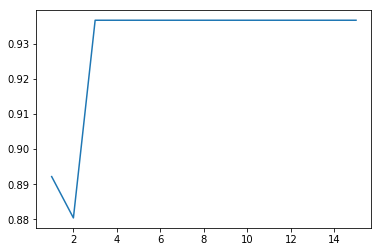

In [55]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)    
print(scores)  

#### lets Evaluate KNN Model
You can see that we are getting best f1 score ** 0.8076 ** with **k = 7.** Lets set k and check classfication report and Confusion matrix for same.

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.96      1.00      0.98        45

avg / total       0.92      0.96      0.94        47

F1 Score:  0.9366327474560592
Accuracy is:  0.9574468085106383


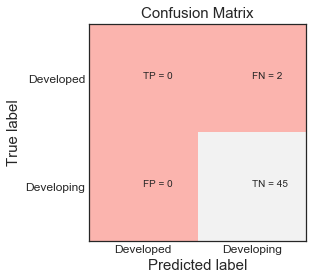

In [56]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
print(dsf)
f1 = f1_score(y_test,pred,average='weighted') 
print('F1 Score: ',f1)
acc = accuracy_score(y_test,pred)
print('Accuracy is: ',acc)
plotConfusion(confusion_matrix(y_test,pred))

#### Random Forest Classifier

In [57]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9574468085106383
Accuracy Score:  0.9574468085106383


#### Fine tuninng Random Forest for different number of estimators

[0.9574468085106383,
 0.9574468085106383,
 0.9258826280102876,
 0.9366327474560592,
 0.9366327474560592,
 0.9366327474560592,
 0.9366327474560592,
 0.9366327474560592,
 0.9366327474560592,
 0.9366327474560592,
 0.9366327474560592,
 0.9366327474560592]

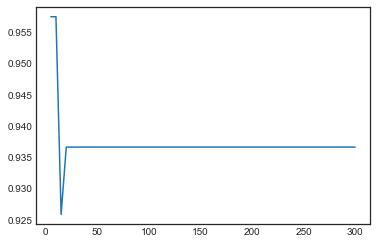

In [58]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
f1_scores

#### Lets fine tune for number of features with best number of estimator from above analysis

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9366327474560592
Accuracy Score:  0.9574468085106383


[0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9258826280102876, 0.9148936170212766, 0.9148936170212766]


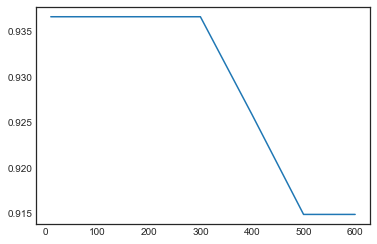

In [60]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=100,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [61]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_features=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)


F1 Score:  0.9366327474560592
Accuracy Score:  0.9574468085106383


#### This is the best combination we got for RFC lets evaluate it

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.96      1.00      0.98        45

avg / total       0.92      0.96      0.94        47



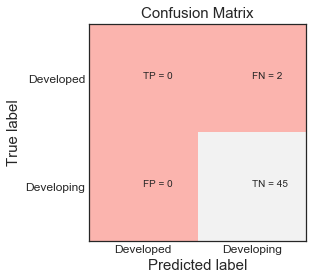

In [62]:
print(cr)
plotConfusion(cm)

#### Logistic regression model

In [63]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9036576619650969
Accuracy Score:  0.8936170212765957


#### Extra tree classifier

In [64]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9574468085106383
Accuracy Score:  0.9574468085106383


[0.9574468085106383, 0.9574468085106383, 0.9258826280102876, 0.9258826280102876, 0.9258826280102876, 0.9258826280102876, 0.9258826280102876, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592]


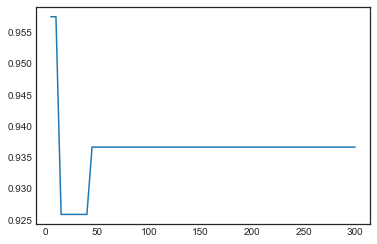

In [65]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [66]:
model = ExtraTreesClassifier(n_estimators=20,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9258826280102876
Accuracy Score:  0.9361702127659575


#### fine tune for max_features

[0.9258826280102876, 0.9366327474560592, 0.9258826280102876, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9752942093367627, 0.9366327474560592, 0.9366327474560592, 0.9752942093367627, 0.9366327474560592]


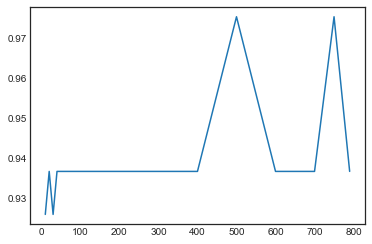

In [67]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600,700,750,790]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=20,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [68]:
model = ExtraTreesClassifier(n_estimators=20,max_features=790,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)

F1 Score:  0.9366327474560592
Accuracy Score:  0.9574468085106383


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.96      1.00      0.98        45

avg / total       0.92      0.96      0.94        47



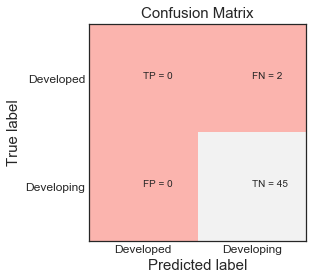

In [69]:
print(cr)
plotConfusion(cm)

#### Recursive Feature Elimination 

In [70]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 783
Best features : Index(['normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"rvalue"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"slope"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"intercept"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"rvalue"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"slope"',
       ...
       'normalized__time_reversal_asymmetry_statistic__lag_1',
       'normalized__time_reversal_asymmetry_statistic__lag_2',
  

In [71]:
cols = X_train.columns[rfecv.support_]

In [72]:
X = X[cols]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [74]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.96      1.00      0.98        45

avg / total       0.92      0.96      0.94        47

Accuracy is:  0.9574468085106383


[0.8723404255319149, 0.851063829787234, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383]


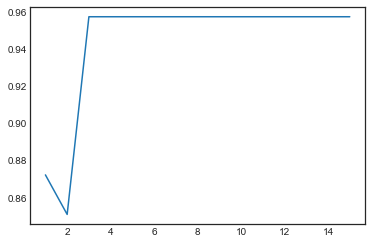

In [75]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

[0.9258826280102876, 0.9258826280102876, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592, 0.9366327474560592]


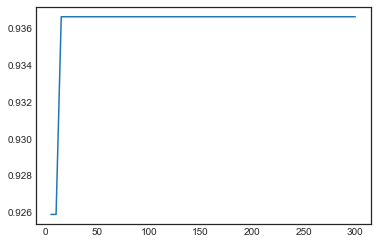

In [76]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [77]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.96      0.98      0.97        45

avg / total       0.92      0.94      0.93        47

Accuracy is:  0.9361702127659575


In [78]:
# We obtained best results without Feature selection RFE

##### Lets Try Clustering 

In [79]:
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

             precision    recall  f1-score   support

          0       0.03      1.00      0.07         4
          1       1.00      0.01      0.02       112

avg / total       0.97      0.04      0.02       116



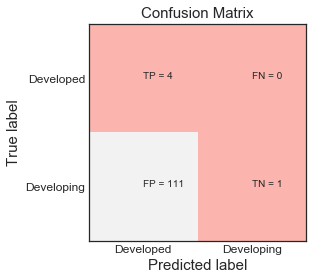

In [80]:
model = KMeans(n_clusters=2,n_init=400,random_state=42,max_iter=1000)
model.fit(X)
y_pred = model.labels_
y_arr = np.array(y)
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

             precision    recall  f1-score   support

          0       0.03      1.00      0.07         4
          1       1.00      0.01      0.02       112

avg / total       0.97      0.04      0.02       116



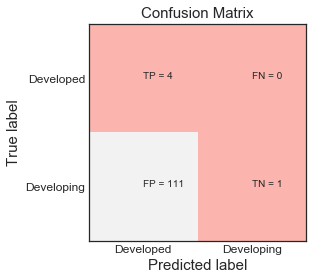

In [81]:

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model = model.fit(X)
y_pred = model.labels_
y_arr = np.array(y)
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

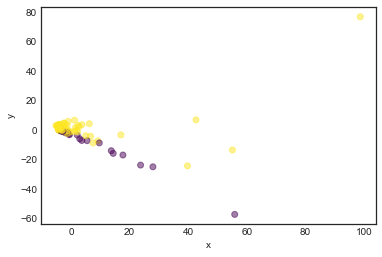

In [102]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

             precision    recall  f1-score   support

          0       0.19      0.91      0.31        33
          1       0.57      0.03      0.06       132

avg / total       0.50      0.21      0.11       165



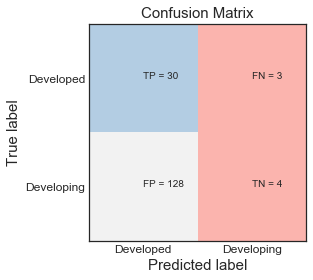

In [94]:
model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
model.fit(X_pca)
y_pred = model.labels_
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

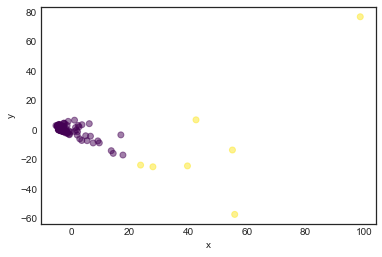

In [95]:
plt.scatter(a,b,alpha=0.5,c=y_pred,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

             precision    recall  f1-score   support

          0       0.43      0.09      0.15        33
          1       0.81      0.97      0.88       132

avg / total       0.73      0.79      0.74       165



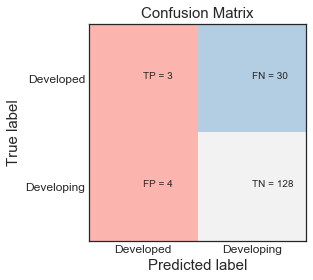

In [96]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model = model.fit(X_pca)
y_pred = model.labels_
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

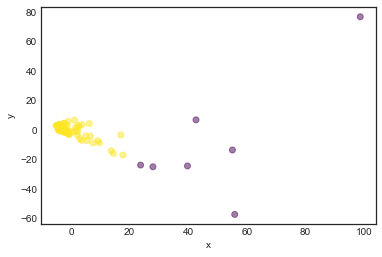

In [97]:
plt.scatter(a,b,alpha=0.5,c=y_pred,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

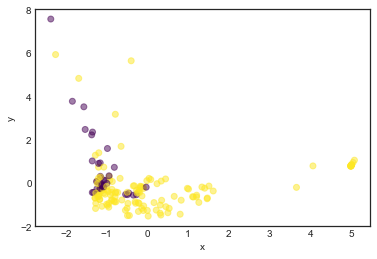

In [98]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        33
          1       0.78      0.88      0.83       132

avg / total       0.62      0.70      0.66       165



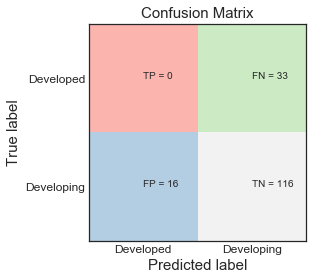

In [99]:
model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
model.fit(X_pca)
y_pred = model.labels_
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

             precision    recall  f1-score   support

          0       0.22      1.00      0.36        33
          1       1.00      0.12      0.22       132

avg / total       0.84      0.30      0.25       165



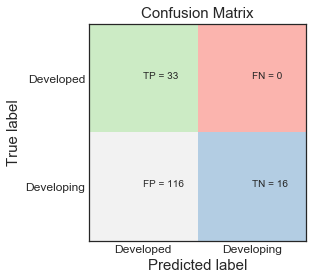

In [100]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model = model.fit(X_pca)
y_pred = model.labels_
y_arr = np.array(y)
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

In [62]:
def testFunctions(dimensions,scaled_df,y_arr):
    pca = PCA(n_components=dimensions)  
    X_pca = pca.fit_transform(scaled_df)
    model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
    model.fit(X_pca)
    y_pred = model.labels_
    score = f1_score(y_pred,y_arr,average='weighted')
    return score

[0.8514646865162329, 0.3032508215226961, 0.3032508215226961, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638, 0.8516718913270638]


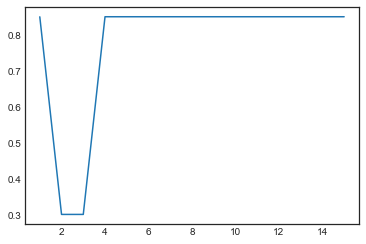

In [63]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)

dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions(dim,scaled_df,y_arr))

plt.plot(dimensions_,scores)    
print(scores)

             precision    recall  f1-score   support

          0       0.43      0.09      0.15        33
          1       0.81      0.97      0.88       132

avg / total       0.73      0.79      0.74       165



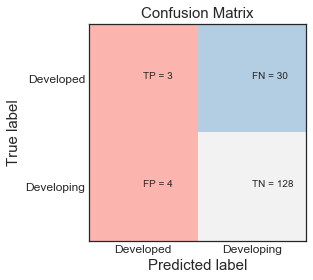

In [64]:
pca = PCA(n_components=14)  
X_pca = pca.fit_transform(scaled_df)
model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
model.fit(X_pca)
y_pred = model.labels_
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))